In [1]:
# import pandas as pd
# import re
# import numpy as np
# import matplotlib.pyplot as plt
# import nltk
# from enum import Enum
# from nltk import pos_tag, word_tokenize
# from nltk.stem import WordNetLemmatizer
# from keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Input, Embedding, Dropout , concatenate
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Model
# from keras.callbacks import Callback, EarlyStopping
# from keras.utils import plot_model
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import roc_auc_score
# import nltk
# nltk.download('omw-1.4')
# pd.set_option('display.width', None)
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')

# Basics
import pandas as pd 
import numpy as np

# Misc
import gc
import time
import warnings
from enum import Enum

# Stats
from scipy import sparse
import scipy.stats as ss

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib_venn as venn
from matplotlib_venn import venn3
import missingno as msno

# Natural Language Processing (NLP)
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
# import nltk
nltk.download('omw-1.4')
pd.set_option('display.width', None)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

# Specific libraries
from keras.layers import Conv1D, MaxPooling1D, GRU, Dense, Input, Embedding, Dropout, concatenate
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.callbacks import Callback, EarlyStopping
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from nltk.corpus import stopwords
from IPython.display import display

import nltk
from nltk.corpus import stopwords

# Download stopwords (if not already downloaded)
nltk.download('stopwords')

# Initialize stopwords
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/deepikanandan/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deepikanandan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/deepikanandan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/deepikanandan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deepikanandan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
class DataProcessor:
    def __init__(self):
        pass

    def data_loading_cleaning(self, file_path):
        # Importing the dataset
        df = pd.read_csv(file_path)

        # Check for missing values and fill missing values with 'unknown'
        df.fillna("unknown", inplace=True)
        null_check = df.isnull().sum()

        # Display null check
        print("Missing Values in DataFrame:\n", null_check)

        # Check for duplicates
        duplicates = df[df.duplicated()]
        # Display duplicates (if any)
        if not duplicates.empty:
            print("Duplicate Rows in DataFrame:")
            print(duplicates)
        else:
            print("No duplicate rows found in DataFrame")
        
        # Remove duplicates
        df.drop_duplicates(inplace=True)
        # Confirmation message after removing duplicates
        print("Duplicates removed. Updated DataFrame shape:", df.shape)
        
        # Mark 'clean' comments
        rowsums = df.iloc[:, 2:].sum(axis=1)
        df['clean'] = (rowsums == 0)

        # Print counts
        total_comments = len(df)
        total_clean_comments = df['clean'].sum()
        total_tags = df.iloc[:, 2:].sum().sum()
        print(f"Total comments = {total_comments}")
        print(f"Total clean comments = {total_clean_comments}")
        print(f"Total tags = {total_tags}")

        return df  # Return the cleaned DataFrame

In [3]:
class EDAVisualizer:
    def __init__(self):
        pass

    def visualize_feature_counts(self, data):
        """
        Visualizes feature counts for Exploratory Data Analysis (EDA).

        Parameters:
        - data: DataFrame containing features for visualization.
        """
        feature_counts = data.sum()
        plt.figure(figsize=(8, 4))
        ax = sns.barplot(x=feature_counts.index, y=feature_counts.values, alpha=0.8)
        plt.title("Feature Counts for EDA")
        plt.ylabel('Count', fontsize=12)
        plt.xlabel('Feature', fontsize=12)

        # Adding text labels to the bars
        rects = ax.patches
        labels = feature_counts.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

        plt.show()

    def visualize_tags_per_comment(self, data):
        """
        Visualizes the count of tags per comment for Exploratory Data Analysis (EDA).

        Parameters:
        - data: DataFrame containing tag information per comment.
        """
        row_sums = data.sum(axis=1)
        tag_counts = row_sums.value_counts()

        plt.figure(figsize=(8, 4))
        ax = sns.barplot(x=tag_counts.index, y=tag_counts.values, alpha=0.8, color='green')  # Change color scheme if needed
        plt.title("Tags per Comment")
        plt.ylabel('# of Occurrences', fontsize=12)
        plt.xlabel('# of Tags', fontsize=12)

        # Adding text labels to the bars
        rects = ax.patches
        labels = tag_counts.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

        plt.show()

    def visualize_correlation_heatmap(self, data):
        """
        Visualizes the correlation heatmap for features in the DataFrame.

        Parameters:
        - data: DataFrame containing features for correlation analysis.
        """
        temp_df = data.copy()  # Create a copy of the DataFrame to avoid modification of the original data
        corr = temp_df.corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
        plt.title("Correlation Heatmap")
        plt.show()

    def highlight_min(data, color='yellow'):
        '''
        Highlight the minimum value in a Series or DataFrame
        '''
        attr = 'background-color: {}'.format(color)
        if isinstance(data, pd.Series):  # For a Pandas Series
            is_min = data == data.min()
            return [attr if v else '' for v in is_min]
        else:  # For a Pandas DataFrame
            is_min = data == data.min().min()
            return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)
    
    def get_distribution(self, df):
        """ Generates a DataFrame showing counts of '1's in specified categories, aiding visualization of categorical data distribution."""
        
        df1 = pd.DataFrame(df.loc[:, "toxic"].value_counts())
        df2 = pd.DataFrame(df.loc[:, "severe_toxic"].value_counts())
        df3 = pd.DataFrame(df.loc[:, "obscene"].value_counts())
        df4 = pd.DataFrame(df.loc[:, "threat"].value_counts())
        df5 = pd.DataFrame(df.loc[:, "insult"].value_counts())
        df6 = pd.DataFrame(df.loc[:, "identity_hate"].value_counts())
    
        df_distribution = pd.concat([df1, df2, df3, df4, df5, df6], axis=1)
        
        percentage_of_1 = []
        for i in range(len(df_distribution.columns)):
            percent_1 = round(df_distribution.iloc[1, i] / (df_distribution.iloc[0, i] + df_distribution.iloc[1, i]) * 100, 2)
            percentage_of_1.append(percent_1)
        
        # Creating a new DataFrame with percentage of '1's for each category
        df_percentage_of_1 = pd.DataFrame({'Percentage_of_1': percentage_of_1}, index=df_distribution.columns)
        
        return df_distribution, df_percentage_of_1
    
    
    def check_overlaps(self, dataframe):
        # Replacing '1's with NaN in the DataFrame
        train_msno = dataframe.replace(1, float("NaN"))
        
        # Visualizing overlaps among 6 columns using missingno's matrix
        msno.matrix(train_msno)
        
    def create_venn_diagram(self, df):
        """
        Creates a Venn diagram illustrating overlaps among 'toxic', 'insult', and 'obscene' columns in the given DataFrame.

        Parameters:
        - df: DataFrame containing columns 'toxic', 'insult', and 'obscene'
        """
        t = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 0)].shape[0]
        i = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
        o = df[(df['toxic'] == 0) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]

        t_i = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 0)].shape[0]
        t_o = df[(df['toxic'] == 1) & (df['insult'] == 0) & (df['obscene'] == 1)].shape[0]
        i_o = df[(df['toxic'] == 0) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]

        t_i_o = df[(df['toxic'] == 1) & (df['insult'] == 1) & (df['obscene'] == 1)].shape[0]

        # Make the diagram
        plt.figure(figsize=(8, 8))
        plt.title("Venn diagram for 'toxic', 'insult', and 'obscene'")
        venn3(subsets=(t, i, t_i, o, t_o, i_o, t_i_o),
              set_labels=('toxic', 'insult', 'obscene'))
        plt.show()
        
        
    def get_word_cloud(self, column, train, stopword):
        """
        Generates a word cloud based on the specified column in the 'train' DataFrame.

        Parameters:
        - column: The column in the DataFrame to generate the word cloud from.
        - train: The DataFrame containing the data.
        - stopword: Stopwords for word cloud generation.
        """
        subset = df[df[column] == 1]
        text = subset.comment_text.values
        wc = WordCloud(background_color="black", max_words=2000, stopwords=stopword)
        wc.generate(" ".join(text))
        plt.figure(figsize=(20, 10))
        plt.axis("off")
        plt.title(f"Words frequented in '{column}' Comments", fontsize=20)
        plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
        plt.show()


In [4]:
class MultiChannelNeuralNetwork():    
    def lemmatizer(self, sentence):
        wnl = WordNetLemmatizer()
        for word, tag in pos_tag(word_tokenize(sentence)):
            if tag.startswith("NN"):
                yield wnl.lemmatize(word, pos='n')
            elif tag.startswith('VB'):
                yield wnl.lemmatize(word, pos='v')
            elif tag.startswith('JJ'):
                yield wnl.lemmatize(word, pos='a')
            elif tag.startswith('R'):
                yield wnl.lemmatize(word, pos='r')
            else:
                yield word

    def msg_processing(self, raw_msg):
        raw_msg = str(raw_msg)
        raw_msg = str(raw_msg.lower())
        raw_msg = re.sub(r'[^a-zA-Z]', ' ', raw_msg)
        words = raw_msg.lower().split()
        temp_words = []
        
        for i in words:
            if len(i) >= 0:
                temp_words.append(i)
        
        meaningful_words = " ".join([w for w in temp_words])
        return(" ".join(self.lemmatizer(meaningful_words)))

    def helperFunction(self, df, dataset_type):
        print ("Start data preprocessing for {d}".format(d = dataset_type))
        df = df.copy()
        df['comment_text'].fillna('Missing',inplace = True)
        cols = ['comment_text']
        df = df[cols]
        df.loc[:, 'comment_text'] = df['comment_text'].replace({r'[^\x00-\x7F]+':''}, regex=True)
        num_msg = df[cols].size
        clean_msg = []
        for i in range(0,num_msg):
            clean_msg.append(self.msg_processing(df['comment_text'][i]))
        
        df['Processed_msg'] = clean_msg
        new_df = df['Processed_msg']
        print ("Data preprocessing Ends!!!")
        return new_df

    def embedding(self, train,test):
        tokenizer = Tokenizer(num_words=10000)
        tokenizer.fit_on_texts(train)
        trainsequences = tokenizer.texts_to_sequences(train)
        traindata = pad_sequences(trainsequences, maxlen = 100)
        testsequences = tokenizer.texts_to_sequences(test)
        testdata = pad_sequences(testsequences, maxlen=100)
        return traindata, testdata, tokenizer

    def get_coefs(self, word,*arr):
        return word, np.asarray(arr, dtype='float32')


    def embedding_matrix_generator(self, tokenizer, embedding_path):
        embeddings_index = dict(self.get_coefs(*o.strip().split()) for o in open(embedding_path, encoding="utf8"))
        
        word_index = tokenizer.word_index
        nb_words = min(10000, len(word_index))
        embedding_matrix = np.zeros((nb_words, 50))
        
        for word, i in word_index.items():
            if i >= 10000: continue
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None: embedding_matrix[i] = embedding_vector

        return embedding_matrix

    def get_target(self, y):
        ytrain=y[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].values
        return ytrain


    def multi_channel_model(self, embedding_matrix):
        input1 = Input(shape = (100,))
        embedding1 = Embedding(10000, 50, weights=[embedding_matrix])(input1)
        conv1 = Conv1D(filters=32, kernel_size=3, activation='relu')(embedding1)
        drop1 = Dropout(0.4)(conv1)
        pool1 = MaxPooling1D(pool_size=4)(drop1)
        gru1 = GRU(100, dropout=0.2, recurrent_dropout=0.2)(pool1)
        
        
        input2 = Input(shape = (100,))
        embedding2 = Embedding(10000, 50, weights=[embedding_matrix])(input2)
        conv2 = Conv1D(filters = 32, kernel_size = 4, activation = 'relu')(embedding2)
        drop2 = Dropout(0.45)(conv2)
        pool2 = MaxPooling1D(pool_size=4)(drop2)
        gru2 = GRU(100, dropout=0.2, recurrent_dropout=0.2)(pool2)
        
        
        input3 = Input(shape = (100,))
        embedding3 = Embedding(10000, 50, weights=[embedding_matrix])(input3)
        conv3 = Conv1D(filters=32, kernel_size=5, activation='relu')(embedding3)
        drop3 = Dropout(0.5)(conv3)
        pool3 = MaxPooling1D(pool_size=4)(drop3)
        gru3 = GRU(100, dropout=0.2, recurrent_dropout=0.2)(pool3)
        
        
        merged = concatenate([gru1,gru2,gru3])
        dense1 = Dense(100, activation='relu')(merged)
        outputs = Dense(6, activation='sigmoid')(dense1)
        
        model = Model(inputs =[input1, input2, input3], outputs = outputs)
        model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def predict(self, model, df):
        pred = model.predict([df,df,df])
        return pred

    def plot_metrics(self, history):
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()

        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()


In [5]:
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()
        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: %d - score: %.6f \n" % (epoch+1, score))

In [6]:
class CONSTANTS(Enum):
#     GLOVE = "/Users/rohitanilkumar/Downloads/glove.6B.50d.txt"
#     INPUT = "/Users/rohitanilkumar/Downloads/jigsaw-toxic-comment-classification-challenge/"
#     MODEL_DIAGRAM = "/Users/rohitanilkumar/Downloads/jigsaw-toxic-comment-classification-challenge/multichannel.png"
    
    GLOVE = "glove.6B.50d.txt"
    INPUT = "jigsaw-toxic-comment-classification-challenge/"
    MODEL_DIAGRAM = "jigsaw-toxic-comment-classification-challenge/multichannel.png"

    ENCODING = "ISO-8859-1"
    BATCH = 100
    EPOCH = 10
    
    DELTA = 0.01
    PATIENCE = 3
    MONITOR = "val_loss"

    TRAIN_SIZE = 0.95
    INTERVAL = 1
    RANDOM_SEED = 43

    LABEL_MAPPING = {
        0: "toxic",
        1: "severe_toxic",
        2: "obscene",
        3: "threat",
        4: "insult",
        5: "identity_hate"
    }
    CLASSES = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
    LABEL = "majority_label"

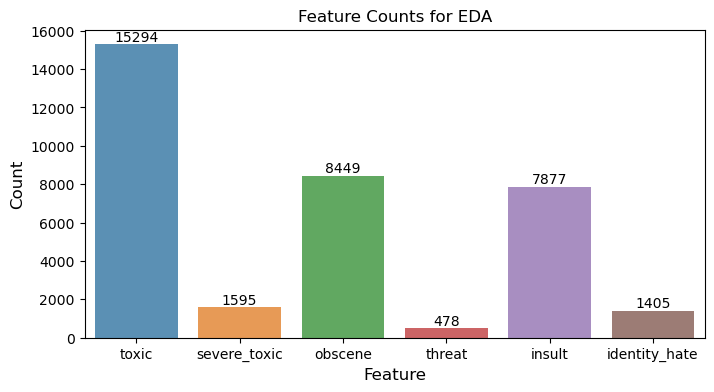

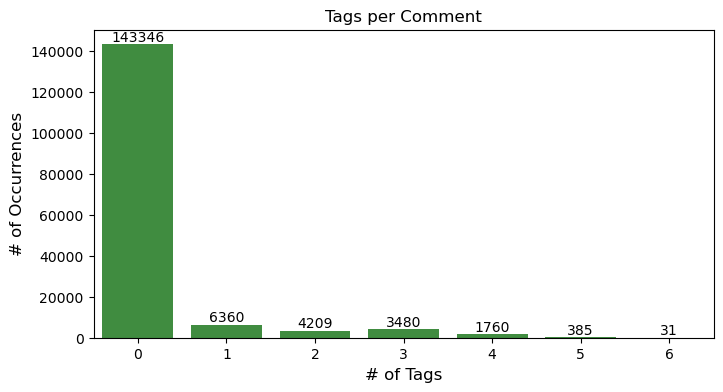

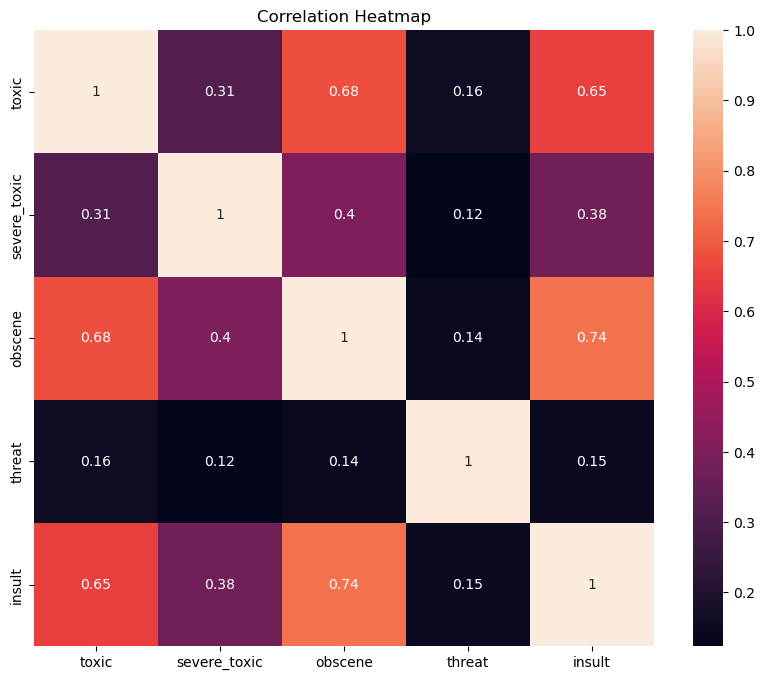

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,144277,157976,151122,159093,151694,158166
1,15294,1595,8449,478,7877,1405


,Percentage_of_1
toxic,9.58
severe_toxic,1.00
obscene,5.29
threat,0.30
insult,4.94
identity_hate,0.88


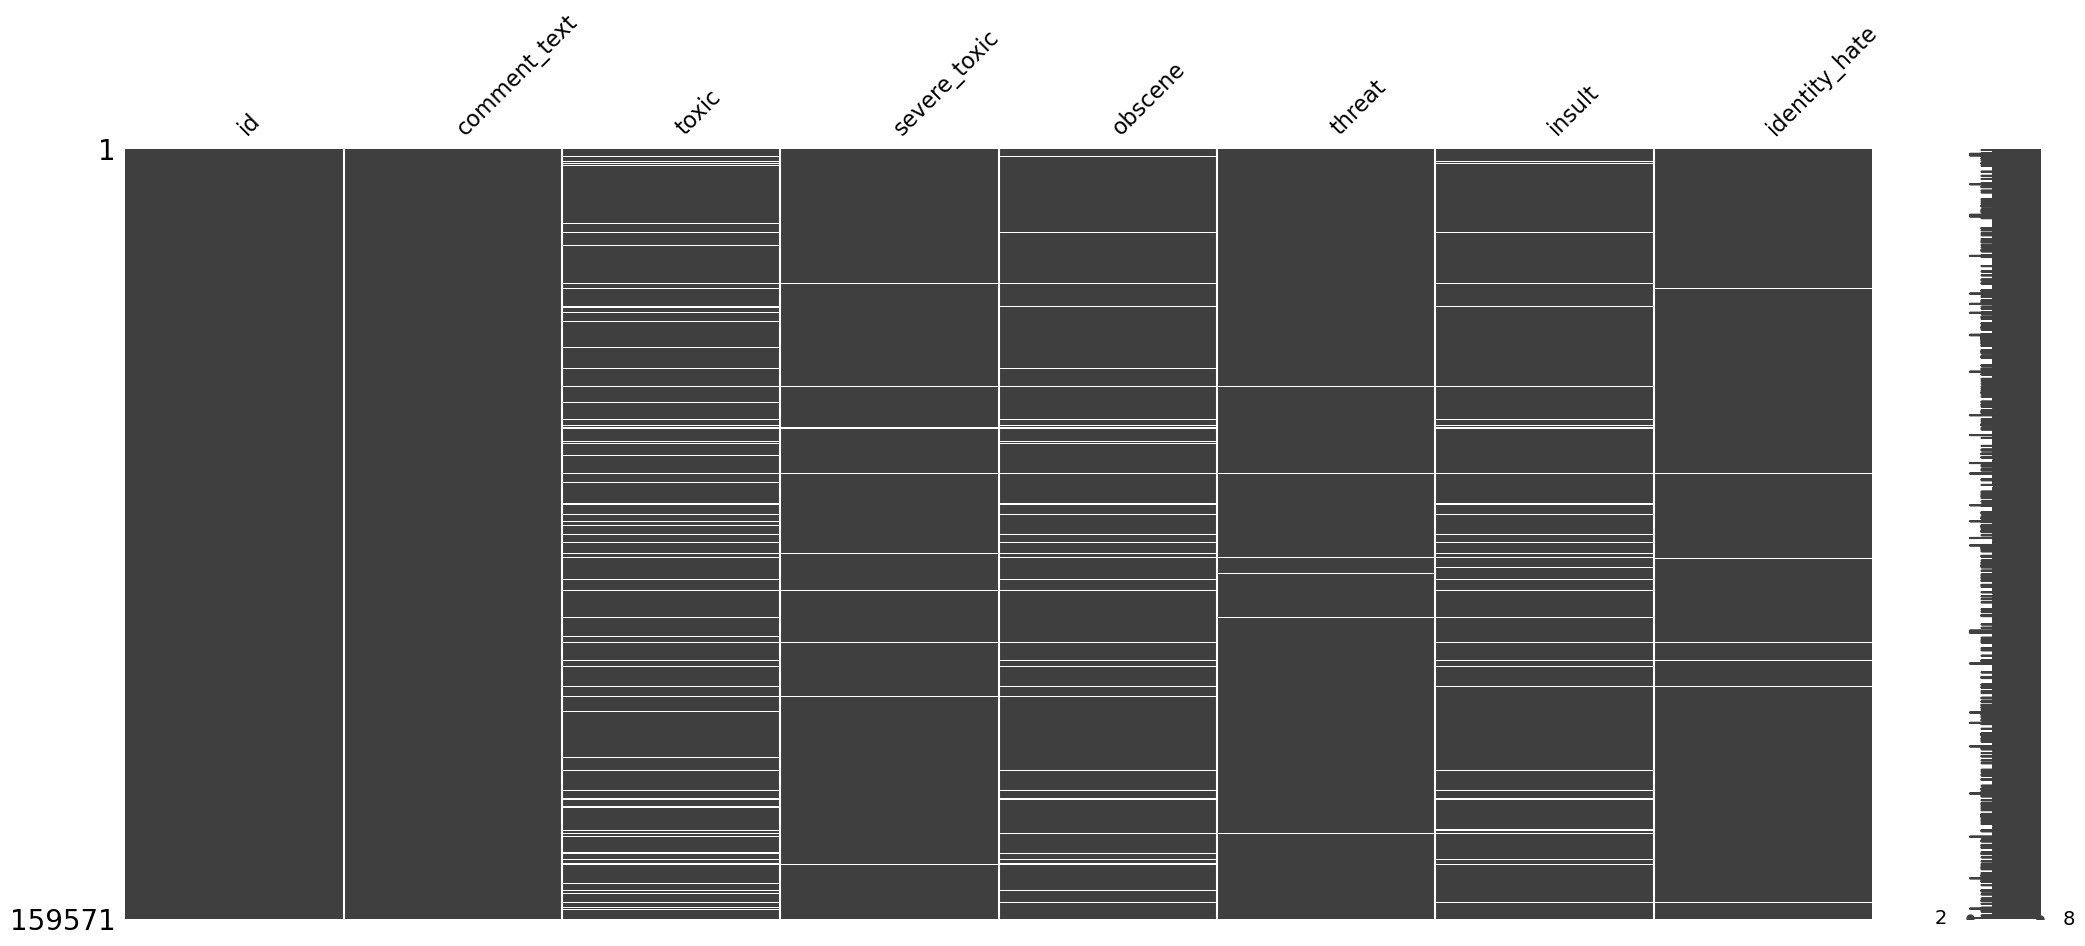

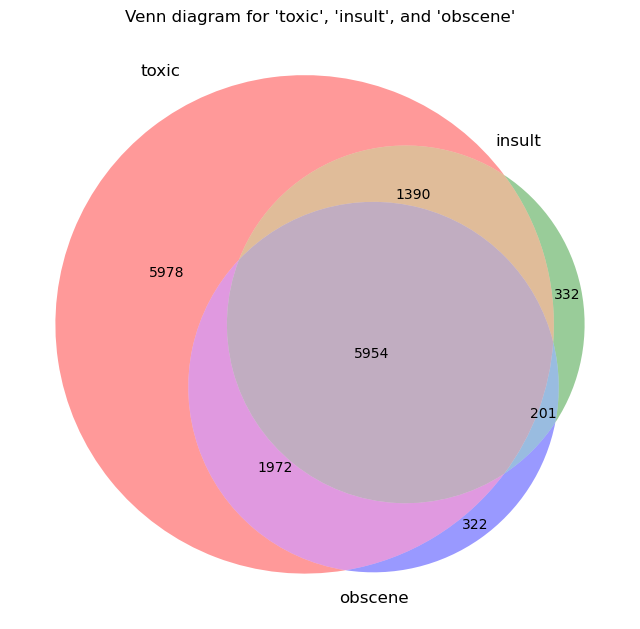

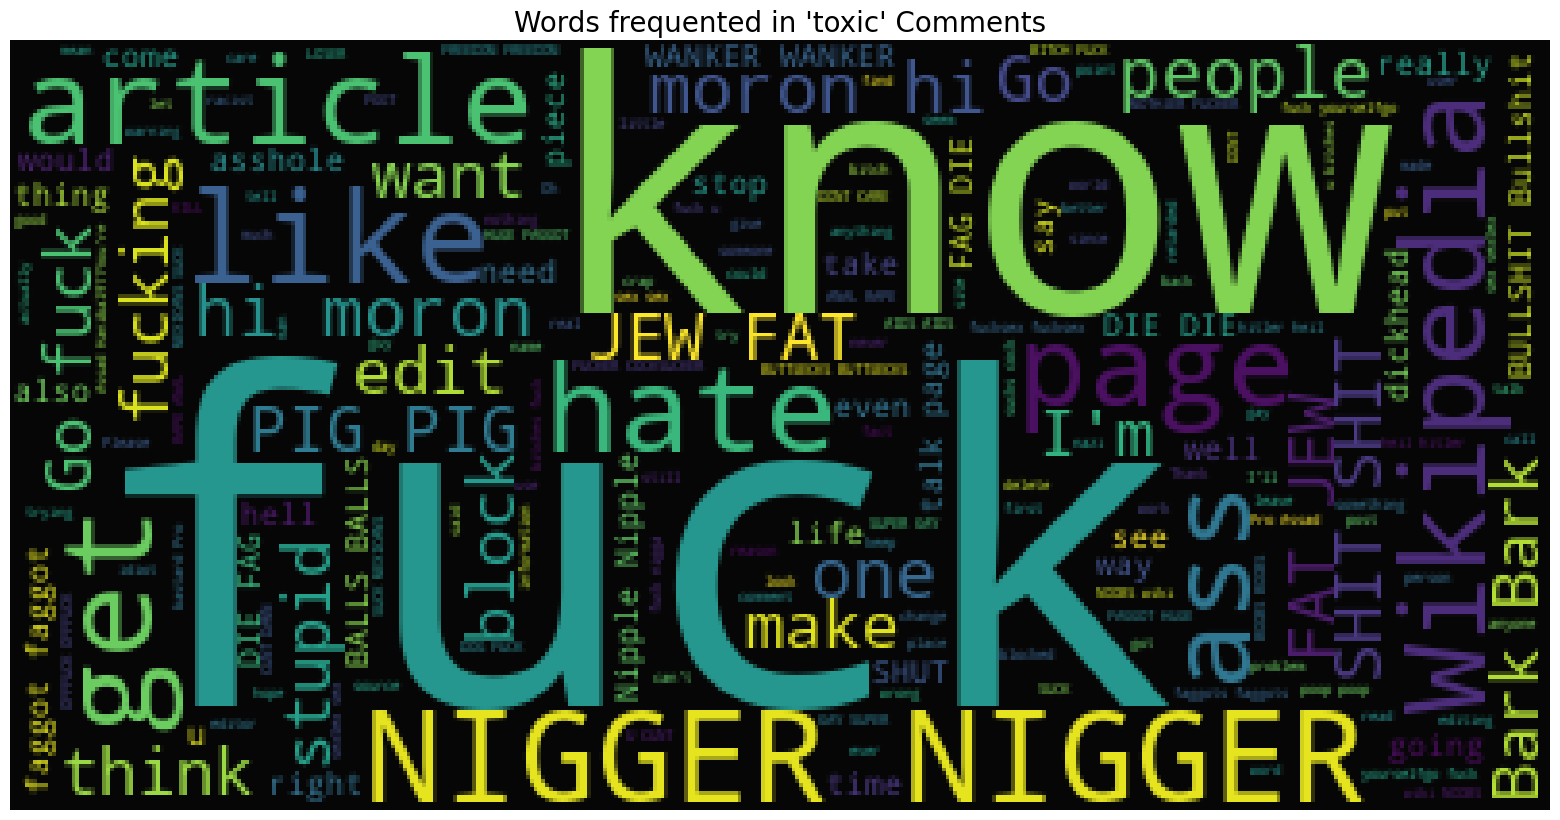

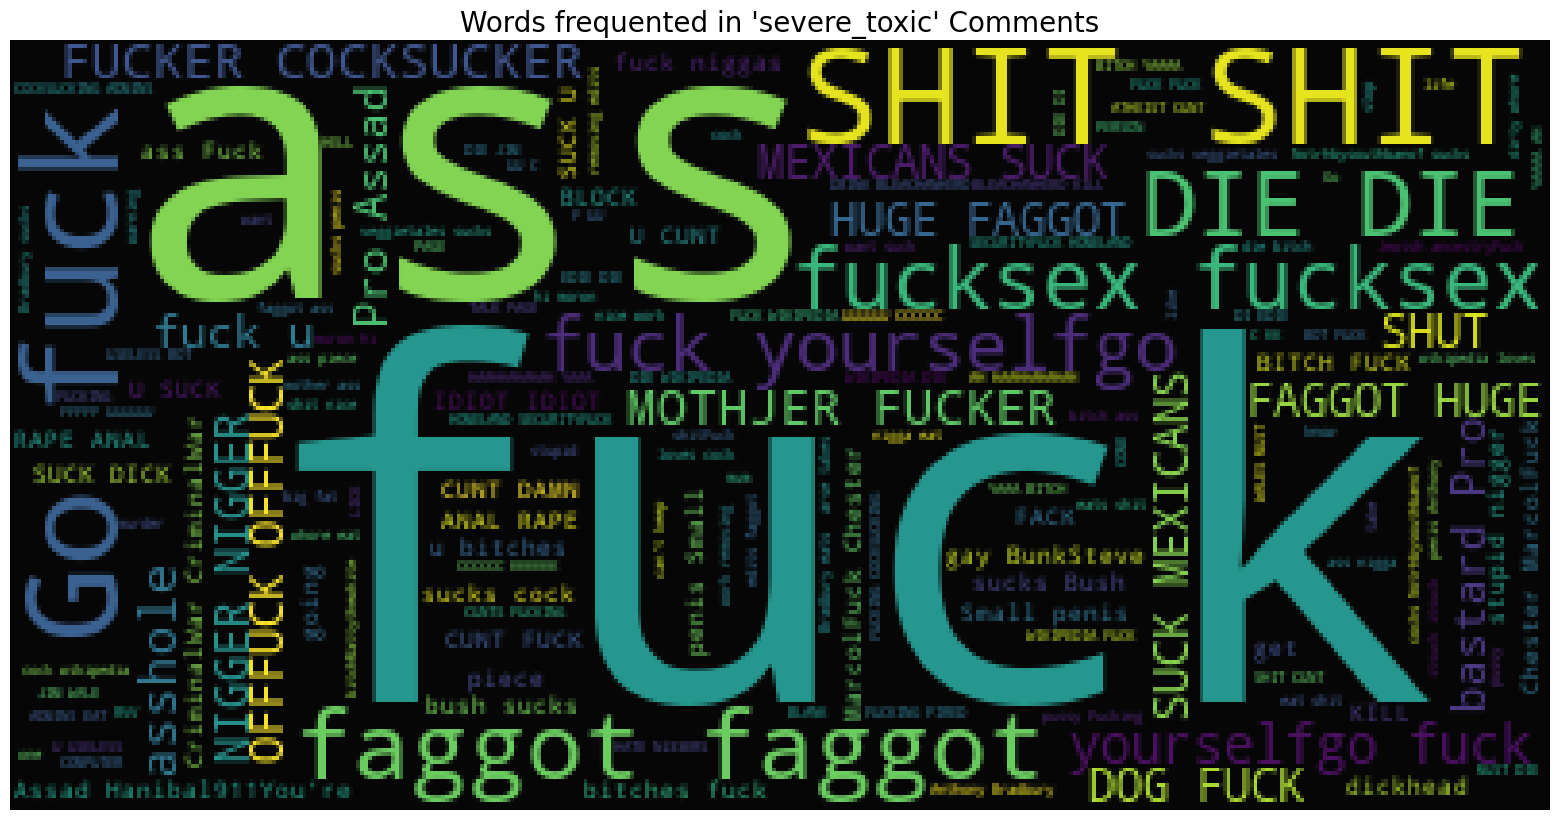

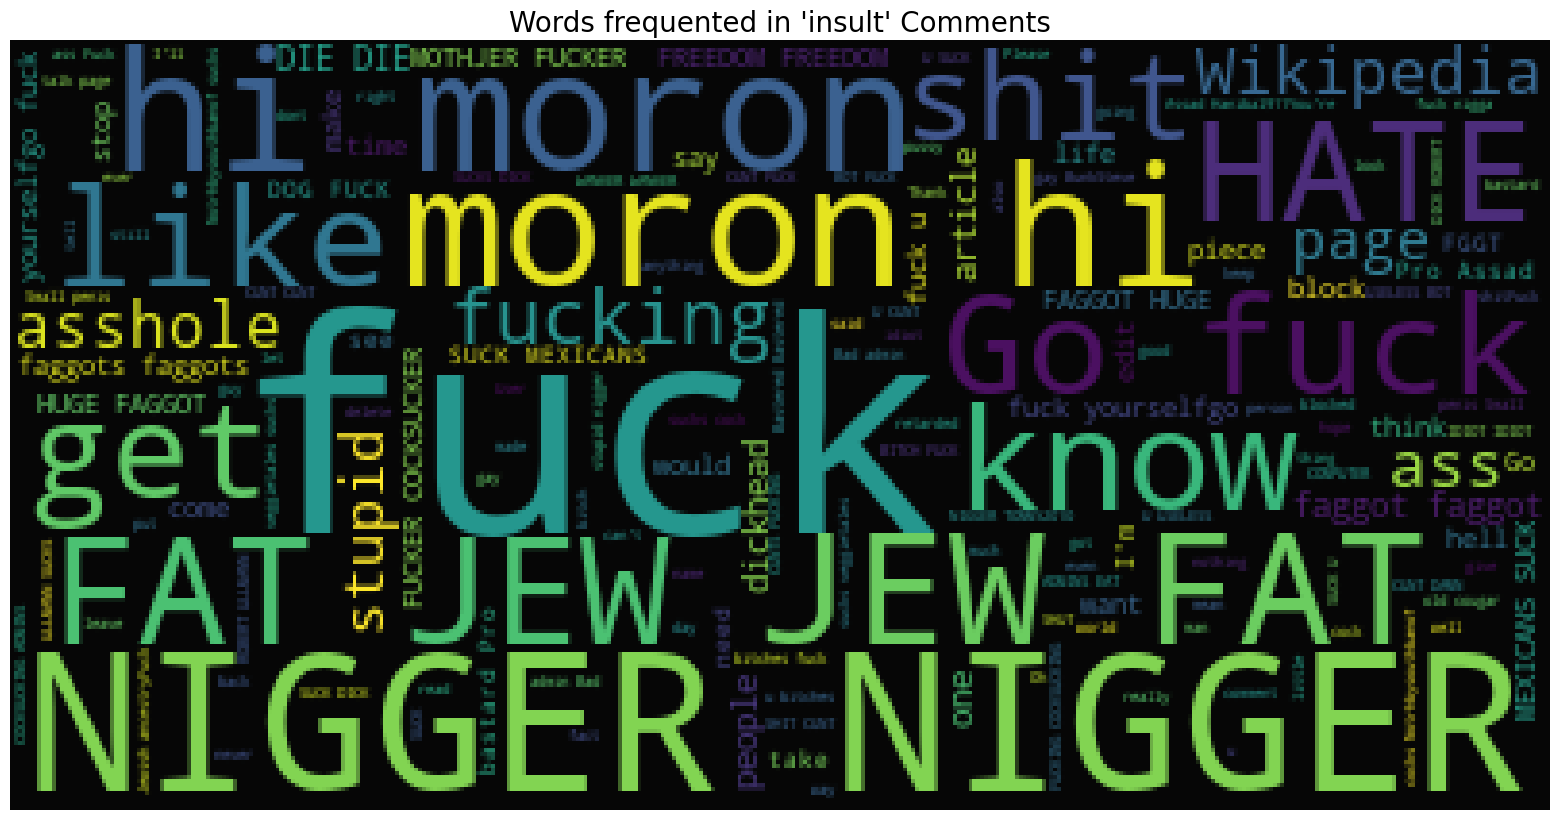

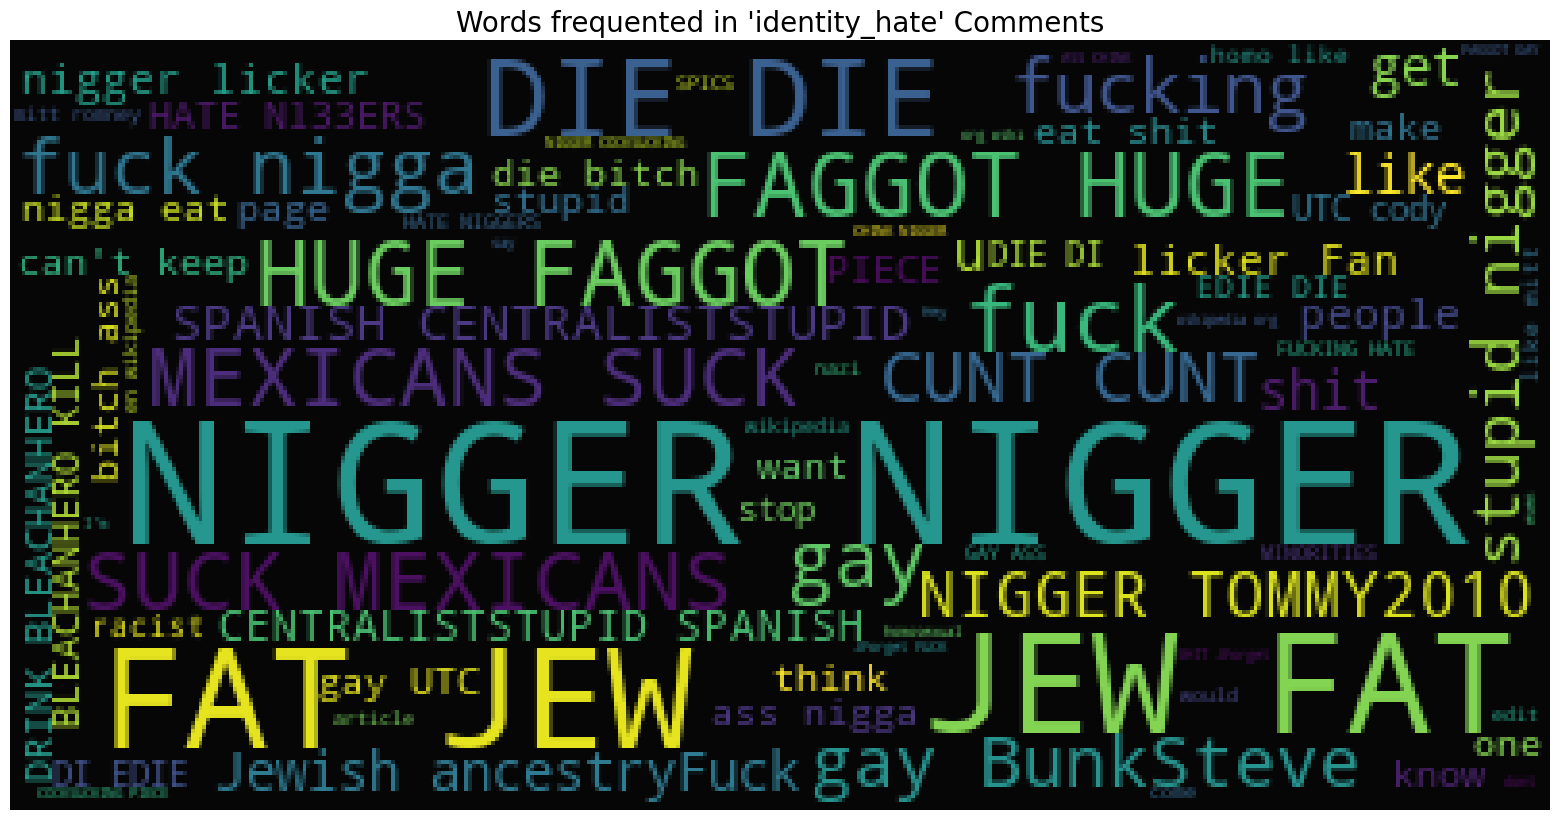

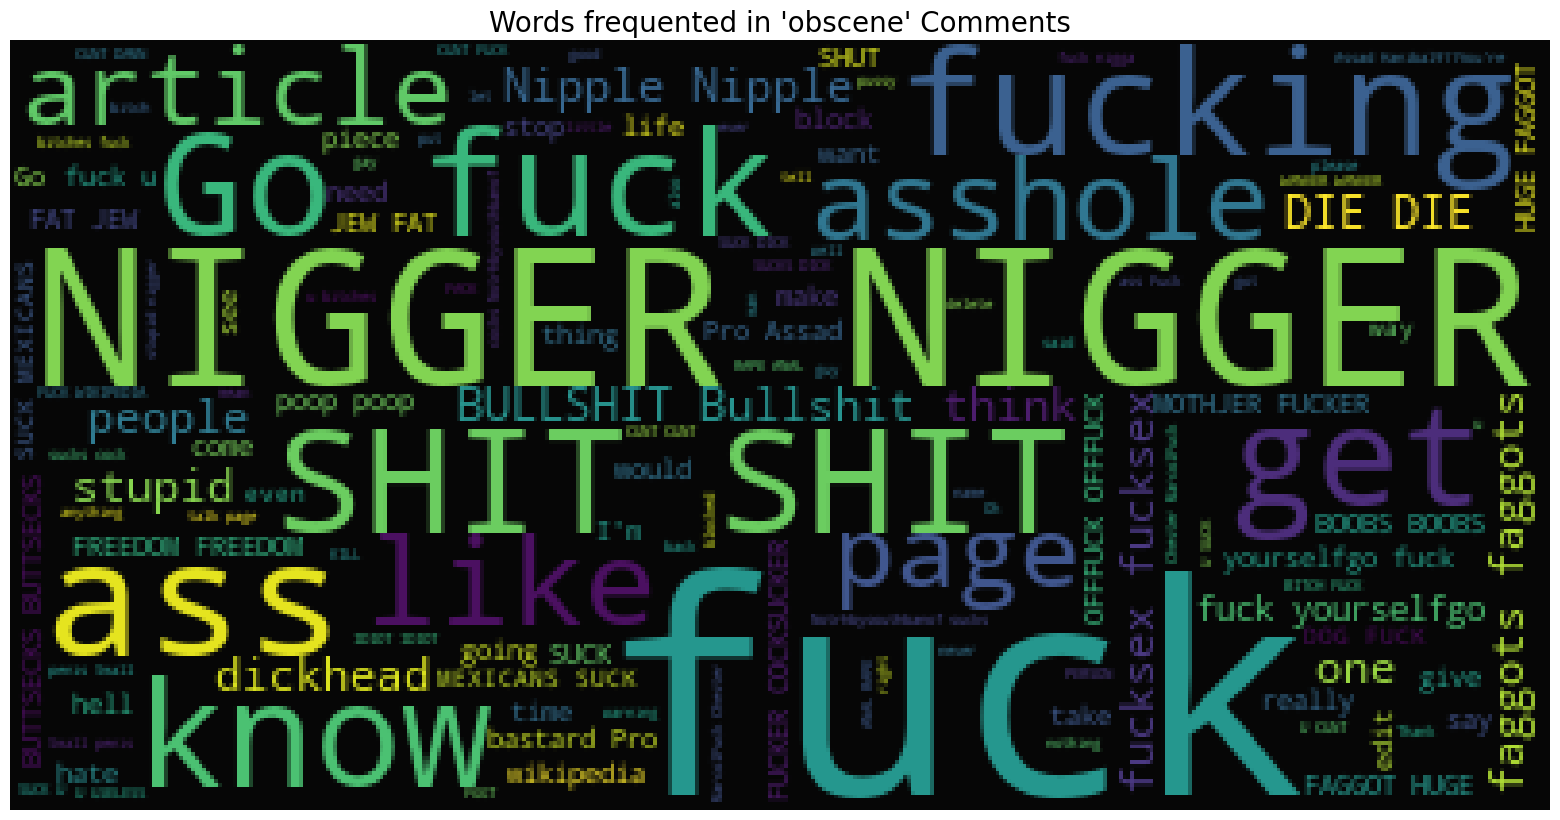

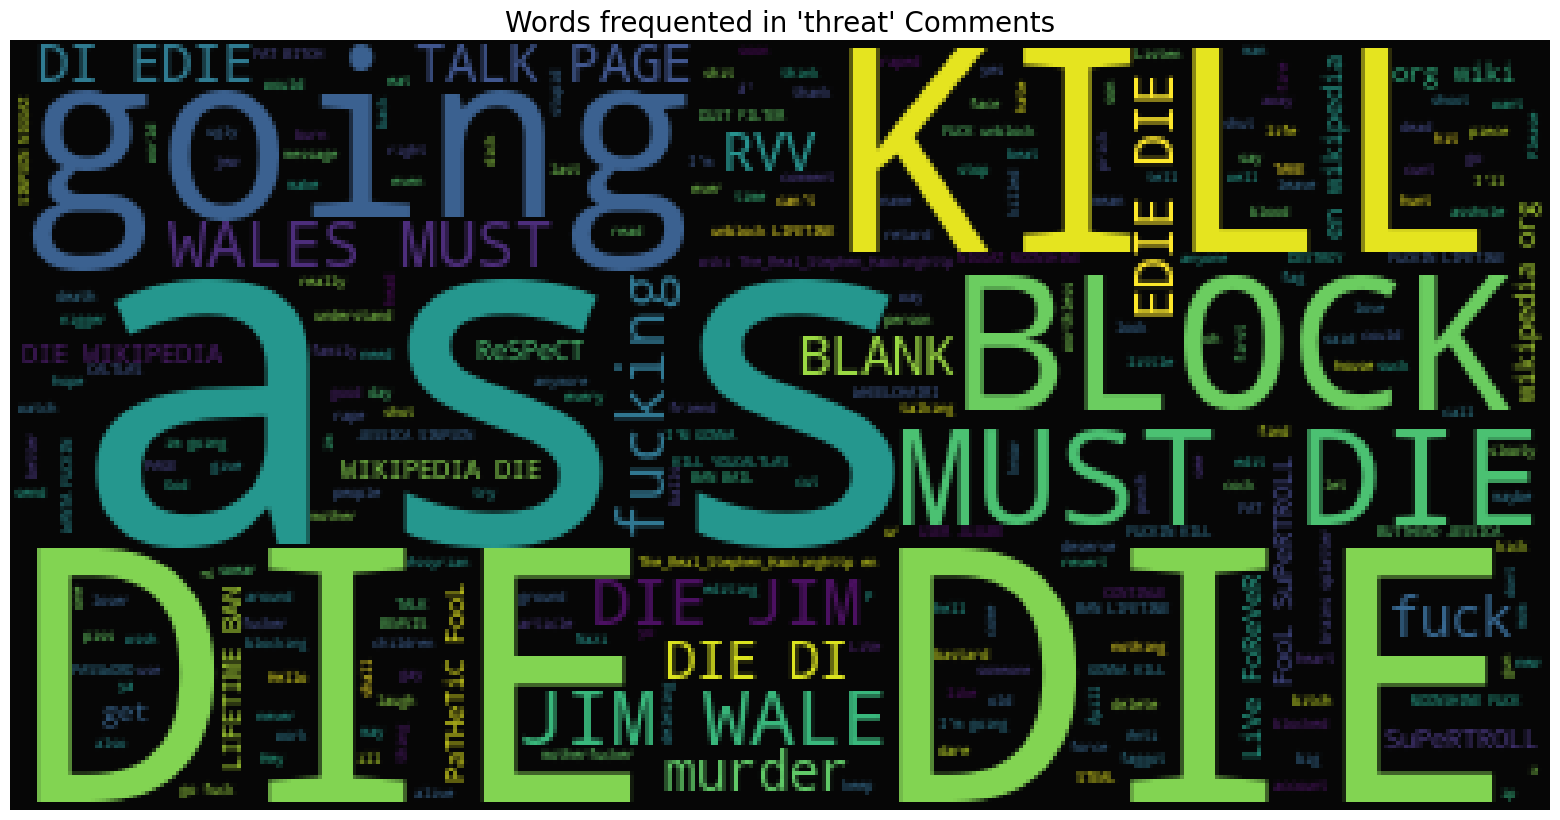

Start data preprocessing for Train dataset


In [ ]:
if __name__ == "__main__":
    
#     file_path = "train.csv"
#     data_processor = DataProcessor()
#     df = data_processor.data_loading_cleaning(file_path)  # cleaned_data


    train_df = df = pd.read_csv(CONSTANTS.INPUT.value + "train.csv", encoding = CONSTANTS.ENCODING.value) 
    test_df = pd.read_csv(CONSTANTS.INPUT.value + "test.csv", encoding = CONSTANTS.ENCODING.value) 
    
    eda_visualizer = EDAVisualizer()
    
    # Assuming columns for visualization start from the third column
    data_to_visualize_feature_counts = df.iloc[:, 2:]
    eda_visualizer.visualize_feature_counts(data_to_visualize_feature_counts)
    
    # Visualize tags per comment
    data_to_visualize_tags_per_comment = df.iloc[:, 2:]  # Assuming the same columns are used for tags
    eda_visualizer.visualize_tags_per_comment(data_to_visualize_tags_per_comment)
    
    # Visualize correlation heatmap
    data_for_heatmap = df.iloc[:, 2:-1]  # Assuming columns for correlation analysis
    eda_visualizer.visualize_correlation_heatmap(data_for_heatmap)
    
    resulting_df, resulting_percentage_df = eda_visualizer.get_distribution(df)
    display(resulting_df)
    display(resulting_percentage_df)
    
    eda_visualizer.check_overlaps(df) 
    
    eda_visualizer.create_venn_diagram(df) 
    
    eda_visualizer.get_word_cloud('toxic', df, stopword) 
    
    eda_visualizer.get_word_cloud('severe_toxic', df, stopword) 
    
    eda_visualizer.get_word_cloud('insult', df, stopword) 
    
    eda_visualizer.get_word_cloud('identity_hate', df, stopword)
    
    eda_visualizer.get_word_cloud('obscene', df, stopword)
    
    eda_visualizer.get_word_cloud('threat', df, stopword)
    
    nn_obj = MultiChannelNeuralNetwork()
    processed_train_df = nn_obj.helperFunction(train_df, "Train dataset")
    processed_test_df = nn_obj.helperFunction(test_df, "Test dataset")

    xtrain,xtest,tokenizer = nn_obj.embedding(processed_train_df, processed_test_df)
    embedding_matrix = nn_obj.embedding_matrix_generator(tokenizer, CONSTANTS.GLOVE.value)
    ytrain = nn_obj.get_target(train_df[CONSTANTS.CLASSES.value])

    X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, train_size = CONSTANTS.TRAIN_SIZE.value, 
                                                      random_state = CONSTANTS.RANDOM_SEED.value)
    
    model = nn_obj.multi_channel_model(embedding_matrix)
    print(model.summary())
    plot_model(model, show_shapes = True, to_file = CONSTANTS.MODEL_DIAGRAM.value)
    
    RocAuc = RocAucEvaluation(validation_data = ([X_val,X_val, X_val], y_val), interval = 1)
    es = EarlyStopping(patience = CONSTANTS.PATIENCE.value, min_delta = CONSTANTS.DELTA.value, 
                       monitor = CONSTANTS.MONITOR.value, restore_best_weights = True)

    hist = model.fit([X_train, X_train, X_train], y_train, batch_size = CONSTANTS.BATCH.value, epochs=CONSTANTS.EPOCH.value, 
                     validation_data=([X_val, X_val, X_val], y_val), callbacks=[RocAuc, es])
    nn_obj.plot_metrics(hist)
    prediction = nn_obj.predict(model, xtest)

    predicted_class = [np.argmax(pred) for pred in prediction]
    predicted_labels = [CONSTANTS.LABEL_MAPPING.value[idx] for idx in predicted_class]
    test_df[CONSTANTS.CLASSES.value] = prediction
    test_df[CONSTANTS.LABEL.value] = predicted_labels

In [ ]:
test_df